In [1]:
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, accuracy_score, precision_score
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import xgboost as xg
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
def plotting_3_chart(df, feature): # several plots describing distribution of a variable
    style.use("fivethirtyeight")
    
    fig = plt.figure(constrained_layout = True, figsize = (15, 8))#constrained_layout:auto adjust object placement.
    grid = gridspec.GridSpec(ncols = 3, nrows = 2, figure = fig)
    
    #Histogram
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1, color = 'g')
    
    #Probability Plot
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Probability Plot')
    stats.probplot(df.loc[:, feature], plot = ax2)
    
    #Box Plot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:, feature], orient = 'v', ax = ax3)

In [3]:
def customized_scatterplot(y, x): # normal scatterplot stuff
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12, 8))
    sns.scatterplot(y = y, x = x)

In [6]:
data_dir = "../data/"

df = pd.read_csv(data_dir + "downloaded_data.csv", index_col = 'Unnamed: 0')
X = pd.read_csv(data_dir + "X.csv", index_col = 'Unnamed: 0')
y = pd.read_csv(data_dir + "y.csv", index_col = 'Unnamed: 0')

data_dir = '../data/min/'

X_min = pd.read_csv(data_dir + 'X.csv', index_col = 'Composition')
y_min = pd.read_csv(data_dir + 'y.csv', index_col = 'Composition')

In [21]:
df_min = df.groupby("Composition").transform("max")

In [22]:
X_min, y_min = df_min.iloc[:, 1:], df_min.iloc[:, 0]

In [15]:
X.to_csv(data_dir + 'min/' + 'X.csv')
X.to_pickle(data_dir + 'min/' + 'X.pkl')

Composition
Ag1             9.888474
Ag1 As1         7.941190
Ag1 As1 F6      3.264040
Ag1 As1 O2      5.066046
Ag1 As1 Ru2    10.185426
                 ...    
Zr6 Ni2 O1      6.988931
Zr6 P2 O1       6.419255
Zr6 Sb2 Pt1     8.182857
Zr6 Te2 Pt1     8.294573
Zr6 Te2 Ru1     7.607092
Name: Density, Length: 24845, dtype: float64

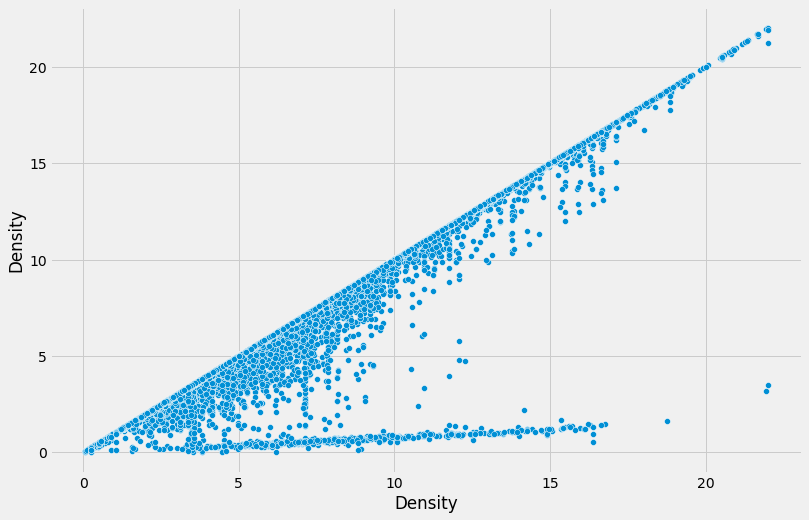

In [23]:
customized_scatterplot(y.Density, y_min.reset_index().Density)

In [13]:
y

,Density
0,1.935039
1,6.064410
2,13.343942
3,4.937886
4,11.035294
...,...
32162,5.383184
32163,5.233225
32164,5.752846
32165,5.824802
